# Milestone 4 - Independent Project
Version: Jun-2020

## Author - Priya Asokan

# Instructions

For Milestone 4 you should

1. Update Milestones 1 through 3, and assignment 9, based on feedback you have received.
2. Enhance your model results by trying different model and/or data enhancement techniques (Build 3 models with different enhancements and feature engineering techniques).
3. Explain your choice of model and model accuracy.
4. Draw direct inferences and conclusions from model results (describe how your model results can improve or provide a solution to the problem you have chosen). Use graphs and evidence from the data to prove your point. Part of being a data scientist is to tell a story that helps the business.

# Abstract
I have used House Sales in King county(USA) dataset.This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

Source: https://www.kaggle.com/harlfoxem/housesalesprediction 

Google drive public link: https://drive.google.com/u/0/uc?id=11BG8_6jBiZMEyp4dGOt5vWsB6AY4-8l9&export=download

I have prepared the data and used various plots and summary statistics to understand the different variables and their relationships between them. I have also understood and derived a correlation between the various feature variables and the response variable 'Price'. I have come up with a hypothesis and tested the hypothesis using various statistical test. In this project I have build and evaluated 3 regression models for house price prediction based on the features of this dataset. I have also build a classification model to classify and label the house price 'greater than median' or 'less than median' using the features of this dataset.

# Problem
This dataset predicts the house price with various features like -sqft_living,Floors, bedrooms, bathrooms,grade, condition, waterfront , view, yr_built ,yr_renovated, zipcode, latitude, longtitude by building regression models and evaluating the models with the best accuracy scores.

Also build a classification model for house price prediction, to classify if the house price is greater than median price or less than median price.

# Conclusion
## Section 1: Data Preparation 
1. Extracted date from dateTime column value and added a new column 'House_age' by by subtracting the built year from the house sold year.
2. Dropped the features-  id,lat,long,zipcode and date as they will not be used.
3. There are no Nan values for any columns in this dataset.
4. Converted 'renovated' and 'sqft_basement' columns to boolean values 0 and 1.Dropped yr_built & yr_renovated columns.
5. Decoded 'condition' column values (1,2,3,4,5) with poor, good and pristine categorical values.
6. One hot encode 'condition' column values with three new columns - good_condition, poor_condition & pristine_condition.
7. There are many outliers for Price column, but the outlier values correspond to values for living square foot, 
bedrooms, bathrooms and also higher grade values. Therefore they are legitimate and we will not remove them.

## Section 2: Data Exploration
From correlation matrix, Some correlated variables -
1. sqft_living & Price
2. sqft_above & sqft_living
3. Grade & Price
4. Grade & Bathrooms
#### From Different plots -
Most number of house prices are between 400,000 to 600,000.
Houses with higher square foot have a higher price. Most of the houses are in 2000 square foot range and are less than a    millon in price.
Pristine condition homes are at a higher price when compared to good condition and poor condition ones.
From the hexbin plot we see that most of the houses sold are between 5 to 20 years old.
Price of the houses with a basement are higher than the price of the houses without a basement. 
Renovated homes have a higher price than the houses that are not renovated.
8 Bedrooms house average price is higher when compared to all other bedrooms.
Grade has a direct effect on price. Higher grade homes have a higher price.
Houses with waterfront view have a higher price when compared to no waterfront view houses.

## Section 3: Hypothesis Testing
The likely distribution for the two features - sqft_living and log_price are normal.

### Results for basic summary statistics by classical, bootstrap, and Bayesian methods & Confidence Interval
##### Hypothesis: The average price of houses with a waterfront are higher than the price of houses without a waterfront

Results of T Tests- There is significant difference between house price with waterfront view and house price without water front view as pvalue is less than alpha(0.05). Hence we reject the null hypothesis and select the alternate hypothesis.

Results of Graphical analysis - The mean of house price with waterfront view and without waterfront view are not within the confidence interval. This confirms that we select the alternate hypothesis that there is significant difference in these means and we reject the null hypothesis.

Results of Bootstrap -The distribution of the difference in means is far from zero. As a result , we can infer that the means of the two populations are significantly different. The points on the Q-Q Normal plot are nearly on a straight line. The distribution of the difference in means are normal, as implied by the CLT. Thus, the bootstrap distribution of the difference in means does conform to the CLT.

Bayesian - By comparing the posterior distributions of the mean house Prices with waterfront view to the distribution of the mean House Prices without waterfront view and by computing and plotting the confidence interval for the two means we see that there is significant price difference between them.
 
Results of ANNOVA & TUKEY's -
The means for Price of Grade- 7 houses with pristine condition and renovated have a significant price difference as their confidence intervals dont overlap shown from the above graph.

The means for Price of Grade- 9 houses with good condition and not renovated have a significant price difference as their confidence intervals dont overlap shown from the above graph.

Since p values for (three bedroom houses and poor condition houses),(four bedroom houses and grade-7 houses) are less than alpha. There is significant difference in price.We select the alertnate hypothesis.

p value for four bedroom houses without any renovation are more than alpha value. So there is no significant difference in price for these categories. We select the null hypothesis and reject the alternate hypothesis.

Bootstrap -The average Price of condition 5 homes with grade 9 and average price of pristine condition homes with one floor and avergae price of view 4 houses with a waterfront view have the distribution of the difference in means far from zero. As a result , we can infer that the means of the two populations compared in each of the above case are significantly different.

The average price of houses with 4 bedrooms and pristine condition have their difference in means very close to zero. As a result we infer that they do not have any significant price difference.

## Section 4: Data Model
### Regression Model
#### Results of three Regression models -
Building a linear model by selecting all the features from the data set to predict price value results in strong multicollinearity problem as the smallest eigenvalue is 3.48e-27.Though R squared value is 0.65.

In order to overcome the problem of multicollinearity, we do feature selection with Principle Component Analysis. PCR is used to calculate the principal components and then use these components for price predictions in linear regression model fit using the least squares method. From scree plot we select the number of principal componenet for analysis to be 5 and it performs a linear regression with first 65columns and finds the best fit with Rsquared value of 0.564.

Laso Regression - The R squared value is 0.683

Ridge Regression - The Rsquared value is 0.587

#### From the above results- Laso regression model performs well.
### Classification Model
1. Selected 5 best features for building a classification model by using univaraite feature selection for classification.(Bedrooms,Bathrooms, sqft_living,grade,sqft_above & sqft_living15) are the features with top scores.
2. House Price predictiction dataset consists of all numerical values.
3. I am building both Gausian and Multinomial Naive Bayes to compare their results.
4. Accuracy for Gaussian Naive Bayes is 0.714 and accuracy for multinomial is 0.587
5. Comparing the results,Gausian Naive Bayes model gives higher accuracy since the dataset consists of all numerical values.
6. ROC curve and AUC values also shows the same.

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy
import scipy.stats as ss
import statsmodels.stats.weightstats as ws
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,mutual_info_regression
from sklearn.feature_selection import f_classif,mutual_info_classif

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
# Location of dataset
HousePrice = pd.read_csv(r'https://drive.google.com/u/0/uc?id=11BG8_6jBiZMEyp4dGOt5vWsB6AY4-8l9&export=download')
print(HousePrice.shape)
print(HousePrice.head())

(21613, 21)
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode    

# Data Preparation

In [3]:
# Drop the features that will not be used
HousePrice.drop(['id','lat','long','zipcode'],inplace = True,axis = 1)

# Get date from dateTime column value
HousePrice['date'] = pd.to_datetime(HousePrice['date'])

# Add a new new column 'House_age' by subtracting the built year from the house sold year
HousePrice['house_age'] = HousePrice['date'].dt.year - HousePrice['yr_built']
HousePrice.drop(['date','yr_built'],inplace = True,axis = 1)# Drop date column

HousePrice.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,house_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,1340,5650,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,1690,7639,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,1360,5000,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,1800,7503,28


In [4]:
#Convert renovated column to 0 and 1
HousePrice['renovated'] = HousePrice['yr_renovated'].apply(lambda x:0 if x == 0 else 1)
HousePrice.drop(['yr_renovated'],inplace = True,axis = 1)#Drop year renovated column

#Convert Sqft_Basement column to 0 and 1
HousePrice['sqft_basement'] = HousePrice['sqft_basement'].apply(lambda x:0 if x == 0 else 1)

HousePrice[['renovated','sqft_basement']].head()

,renovated,sqft_basement
0,0,0
1,1,1
2,0,0
3,0,1
4,0,0


In [5]:
# Decode Condition column to poor, good & pristine
HousePrice.loc[HousePrice.loc[:, "condition"] == 1, "condition"] = "poor"
HousePrice.loc[HousePrice.loc[:, "condition"] == 2, "condition"] = "poor"
HousePrice.loc[HousePrice.loc[:, "condition"] == 3, "condition"] = "good"
HousePrice.loc[HousePrice.loc[:, "condition"] == 4, "condition"] = "good"
HousePrice.loc[HousePrice.loc[:, "condition"] == 5, "condition"] = "pristine"

# One hot encode -Create 3 new columns, one for each state in "condition"
HousePrice.loc[:, "poor_condition"] = (HousePrice.loc[:, "condition"] == "poor").astype(int)
HousePrice.loc[:, "good_Condition"] = (HousePrice.loc[:, "condition"] == "good").astype(int)
HousePrice.loc[:, "pristine_condition"] = (HousePrice.loc[:, "condition"] == "pristine").astype(int)


In [6]:
print(HousePrice['condition'].unique())
HousePrice.head()

['good' 'pristine' 'poor']


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age,renovated,poor_condition,good_Condition,pristine_condition
0,221900.0,3,1.00,1180,5650,1.0,0,0,good,7,1180,0,1340,5650,59,0,0,1,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,good,7,2170,1,1690,7639,63,1,0,1,0
2,180000.0,2,1.00,770,10000,1.0,0,0,good,6,770,0,2720,8062,82,0,0,1,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,pristine,7,1050,1,1360,5000,49,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,good,8,1680,0,1800,7503,28,0,0,1,0


In [7]:
# Check for Nan values in HousePrice dataframe
HousePrice.isnull().values.any()

False

# Data Exploration

In [8]:
# correlation between the variables
HousePrice.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age,renovated,poor_condition,good_Condition,pristine_condition
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.667434,0.605567,0.180230,0.585379,0.082447,-0.053951,0.126092,-0.056021,-0.035698,0.057585
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.356967,0.477600,0.163471,0.391638,0.029244,-0.154324,0.018553,-0.061995,-0.005669,0.028119
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,0.664983,0.685342,0.163534,0.568634,0.087175,-0.506407,0.050260,-0.089084,0.062837,-0.034292
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,0.762704,0.876597,0.204495,0.756420,0.183286,-0.318488,0.055094,-0.073890,0.042325,-0.018136
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,0.113621,0.183512,-0.035346,0.144608,0.718557,-0.052990,0.007745,0.037182,0.001150,-0.014497
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,0.458183,0.523885,-0.256560,0.279885,-0.011269,-0.489640,0.006260,-0.060866,0.135218,-0.120545
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.082775,0.072075,0.037227,0.086463,0.030703,0.026093,0.093294,0.002649,-0.014434,0.014243
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.251321,0.167649,0.181808,0.280439,0.072575,0.053458,0.104062,-0.015894,-0.027300,0.034408
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,1.000000,0.755923,0.051838,0.713202,0.119248,-0.447415,0.014008,-0.103779,0.114607,-0.083520
sqft_above,0.605567,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,0.755923,1.000000,-0.210991,0.731870,0.194050,-0.424248,0.023178,-0.065631,0.106340,-0.088453


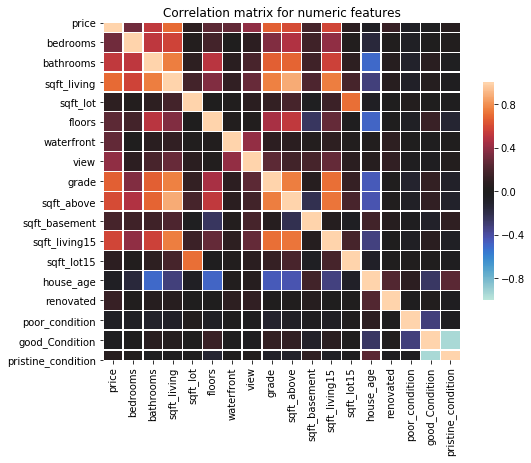

In [9]:
# HeatMap to show the correlation between the variables
plt.figure(figsize=(8, 8))
sns.heatmap(HousePrice.corr(),vmax=1.0,vmin = -1, center=0,
            square=True, linewidths=.25,cbar_kws={"shrink": .5})
plt.title('Correlation matrix for numeric features')# Give the plot a main title
plt.yticks(rotation='horizontal') # Set text for x axis
plt.xticks(rotation='vertical') # Set text for y axis
plt.show()

In [10]:
# Correlation to price column between different features
HousePrice.corr().loc[:,['price']]

,price
price,1.000000
bedrooms,0.308350
bathrooms,0.525138
sqft_living,0.702035
sqft_lot,0.089661
floors,0.256794
waterfront,0.266369
view,0.397293
grade,0.667434
sqft_above,0.605567


##### we dont see any perfect linear relationship between the variables and price.Here are some correlated variables -
1. sqft_living & Price
2. sqft_above & sqft_living
3. Grade & Price
4. Grade & Bathrooms

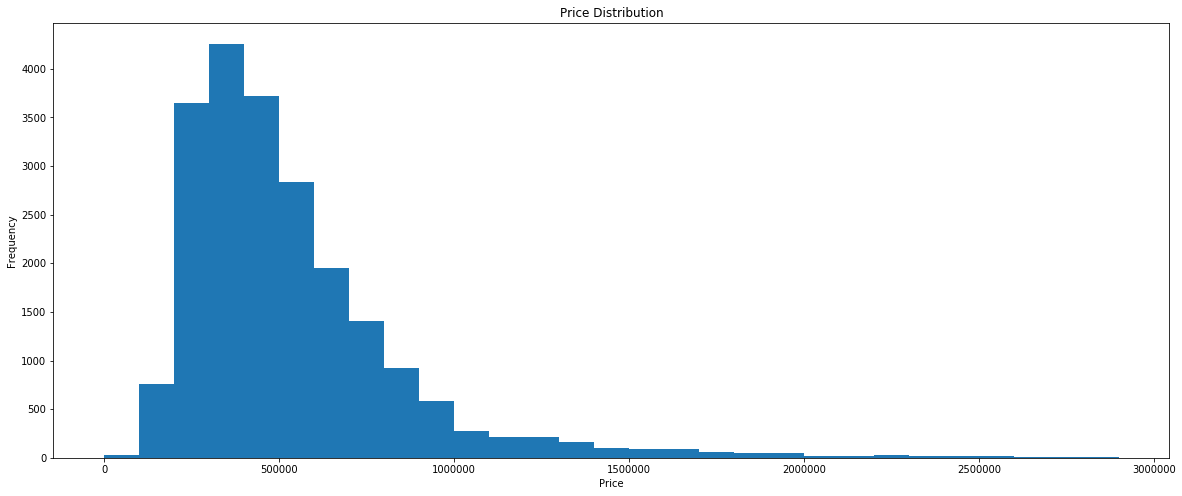

In [11]:
# Distribution of Price
plt.figure(figsize = (20,8))
binwidth=100000
HousePrice.loc[:,'price'].plot.hist(bins = range(0,3000000, 100000))
plt.title('Price Distribution')# Give the plot a main title
plt.xlabel('Price') # Set text for x axis
plt.show()

##### Most number of house prices are between 400,000 to 600,000.

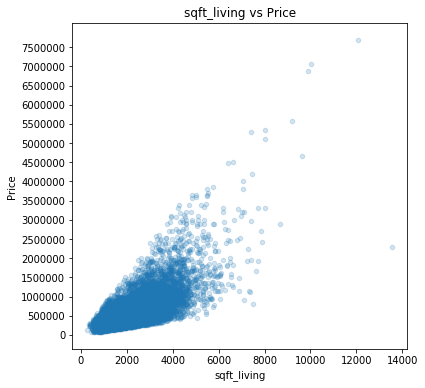

In [12]:
# Scatter Plot for Sqft_living vs Price
ax = plt.figure(figsize=(6, 6)).gca() # define axis
plt.yticks(np.arange(0,8000000,500000))
HousePrice.plot.scatter(x = 'sqft_living', y = 'price', ax = ax, alpha = 0.2)
ax.set_title('sqft_living vs Price') # Give the plot a main title
ax.set_xlabel('sqft_living')# Set text for y axis
ax.set_ylabel('Price')# Set text for x axis
plt.show()

##### Houses with higher square foot have a higher price. Most of the houses are in 2000 square foot range and are less than a millon in price.


[Text(0, 0.5, 'Price'), Text(0.5, 0, 'House Basement')]

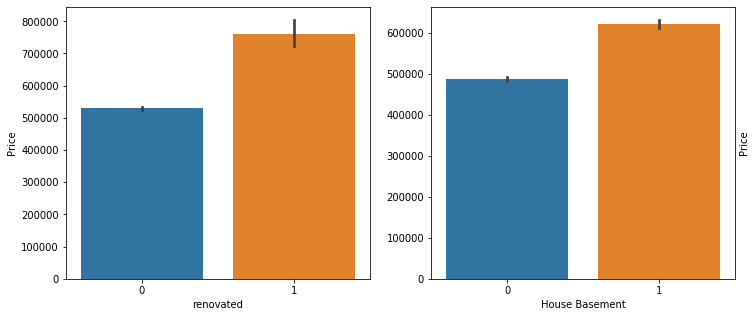

In [13]:
# Bar plot to show relationship between (renovation & Price) and (sqft_basement & Price) 
f, axes = plt.subplots(1, 2,figsize=(12,5))
sns.barplot(x=HousePrice['renovated'],y=HousePrice['price'], ax=axes[0])
sns.barplot(x=HousePrice['sqft_basement'],y=HousePrice['price'], ax=axes[1])
axes[0].set(xlabel='renovated', ylabel='Price')
axes[1].yaxis.set_label_position("right")
axes[1].set(xlabel='House Basement', ylabel='Price')

##### Price of the houses with a basement are higher than the price of the houses without a basement. Renovated homes have a higher price than the houses that are not renovated.

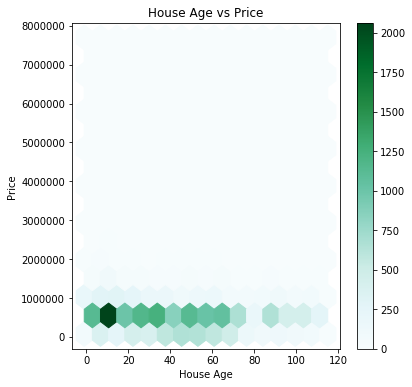

In [14]:
# Hexbin plot for Age of the house vs Price
ax = plt.figure(figsize=(6, 6)).gca() # define axis
HousePrice.plot.hexbin(x = 'house_age', y = 'price', gridsize = 15, ax = ax)
ax.set_title('House Age vs Price') # Give the plot a main title
ax.set_ylabel('Price')# Set text for y axis
ax.set_xlabel('House Age')# Set text for x axis
plt.show()

##### From the hexbin plot we see that most of the houses sold are between 5 to 20 years old.

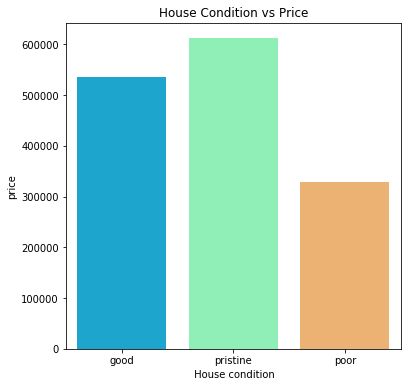

In [15]:
ax = plt.figure(figsize=(6, 6))
g = sns.barplot(x = 'condition', y = 'price', 
               data = HousePrice,             
               palette="rainbow",           
               ci = None)       
plt.xlabel(' House condition')# Set text for x axis
plt.ylabel('price')# Set text for y axis
plt.title('House Condition vs Price')# Set text for title
plt.show()

##### Pristine condition homes are at a higher price when compared to good condition and poor condition ones.

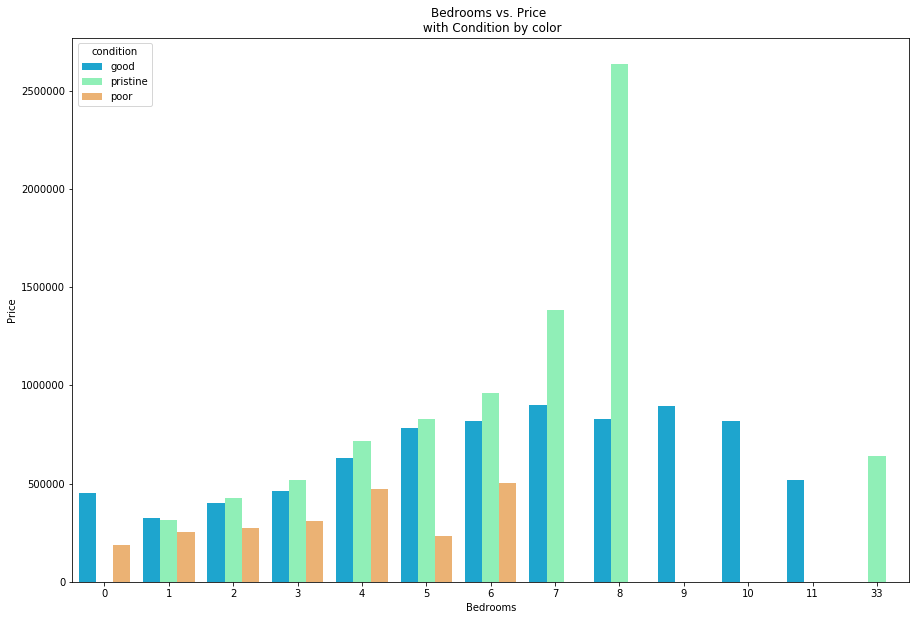

In [16]:
# Bar plot for house price vs house condition and number of bathrooms
ax = plt.figure(figsize=(15, 10))

g = sns.barplot(x = 'bedrooms', y = 'price', 
           data = HousePrice,             
           palette="rainbow",
           hue = "condition",
           ci = None)   
plt.xlabel('Bedrooms')# Set text for x axis
plt.ylabel('Price')# Set text for y axis
g.legend(loc='upper left', bbox_to_anchor=(0.001,1 ),title = 'condition', ncol=1) # Set hue box to the upperleft of the plot
plt.title('Bedrooms vs. Price \n with Condition by color')# Set text for title
plt.show()

##### 8 Bedrooms house average price is higher when compared to all other bedrooms

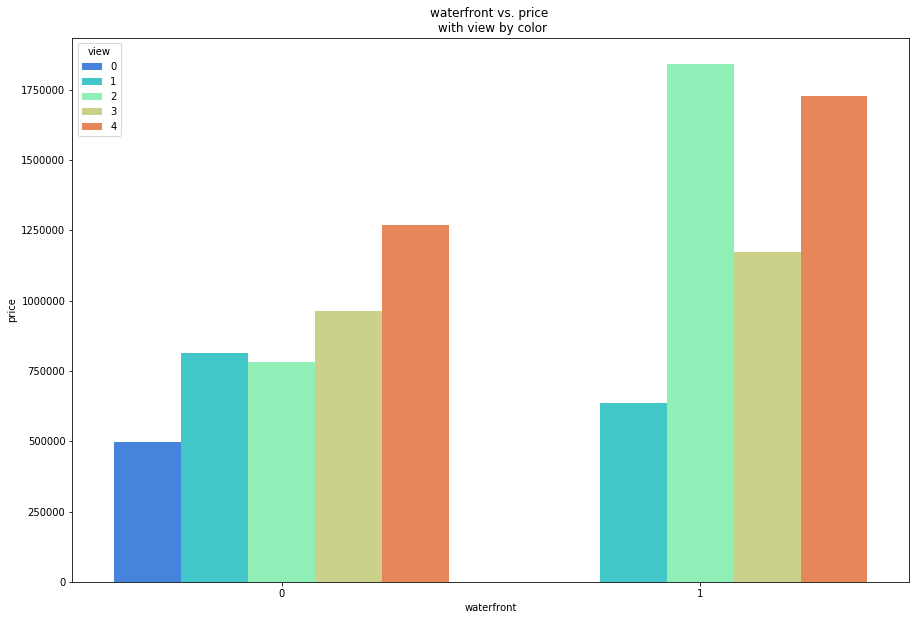

In [17]:
# Bar plot for house price with both WaterFront & View
ax = plt.figure(figsize=(15, 10))
g = sns.barplot(x = 'waterfront', y = 'price', 
           data = HousePrice,             
           palette="rainbow",
           hue = "view",
           ci = None)       
plt.xlabel('waterfront')# Set text for x axis
plt.ylabel('price')# Set text for y axis
g.legend(loc='upper left', bbox_to_anchor=(0.001, 1),title ='view', ncol=1) # Set hue box to the upper left of the plot
plt.title('waterfront vs. price \n with view by color')# Set text for title
plt.show()

##### Houses with waterfront view have a higher price when compared to no waterfront view houses.

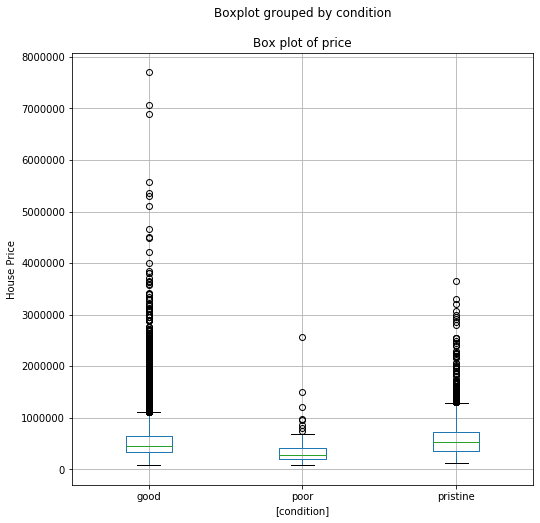

In [18]:
#Box plot for different grades vs price
fig = plt.figure(figsize=(8, 8)) # Define plot area
ax = fig.gca() # Define axis 
HousePrice.loc[:,['price', 'condition']].boxplot(by = 'condition', ax = ax)
ax.set_title('Box plot of price') # Give the plot a main title
ax.set_ylabel('House Price')# Set text for y axis
plt.show()

#####  From the above box plot we see that , grade has a direct effect on price. Higher grade homes have a higher price.

# Hypothesis Testing

## Identifying likely distribution for two columns - 'log_price' & 'sqft_living'

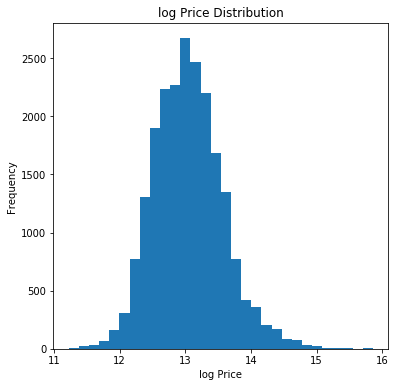

In [19]:
# Adding a new column log_price
HousePrice['log_price'] = np.log(HousePrice['price'])

# Distribution of Log Price
plt.figure(figsize = (6,6))
HousePrice.loc[:,'log_price'].plot.hist(bins = 30)
plt.title('log Price Distribution')# Give the plot a main title
plt.xlabel('log Price') # Set text for x axis
plt.show()

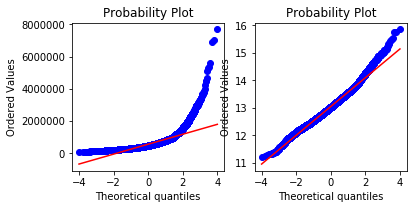

In [20]:
def qq_plot(vec1, vec2):    
    plt.figure(figsize=(6, 6)).gca() # define axis
    ax1 = plt.subplot(221) ## setup the left subplot
    ss.probplot(vec1, plot = ax1) ## Plot the left subplot
    ax1 = plt.subplot(222) ## Set up the right subplot
    ss.probplot(vec2, plot = ax1) ## Plot the right subplot
qq_plot(HousePrice.loc[:,'price'], HousePrice.loc[:,'log_price']) 

In [21]:
# Posterior function to compute probabilities
def posterior(prior, like):
    post = prior * like # compute the product of the probabilities
    return post / sum(post) # normalize the distribution to sum to unity

Mean = 2079.900, Standard deviation = 918.420


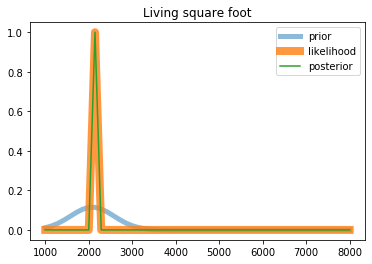

Mean = 13.048, Standard deviation = 0.527


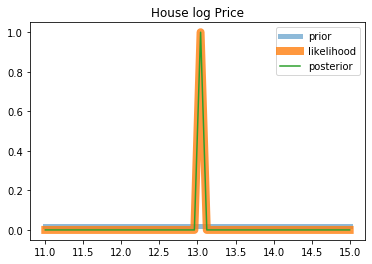

In [22]:
# Function to compute likelihood
def comp_like(p, x): 
    variance = np.std(x)**2 # sigmasqr
    x_mean = np.asarray(x).mean()  # xbar
    print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, np.std(x)))
    n = len(x)
    l = np.exp(-n * np.square(x_mean - p) / (2 * variance))
    return l / l.sum()

# Function to calculate likelihood and prior distributions for various features    
def bayesian(col, title, n, x1, x2, s):
    N = n
    p = np.linspace(x1, x2, num=N)# linspace to spread the values for x axis    
    pp = scipy.stats.norm.pdf(p, loc=HousePrice[col].mean(), scale=s)# Calculate prior probability
    pp = pp / pp.sum() # normalize
    like = comp_like(p, HousePrice[col])# function call to compute likelihood
    post = posterior(pp, like) # function call to compute posterior
    plt.plot(p, pp, label='prior', alpha = .5, linewidth=5) # Plot prior distribution
    plt.plot(p, like, label='likelihood', alpha=.8, linewidth=8) # Plot likelihood distribution
    plt.plot(p, post, label='posterior')# Plot posterior distribution
    plt.title(title)
    plt.legend()
    plt.show()


bayesian('sqft_living','Living square foot', 50, 1000, 8000,500) # Function call to get the 'sqft_living' distribution
bayesian('log_price','House log Price',50,11,15,10000) # Function call to get the 'log_price' distribution

##### Results - The likelihood distribution for 'log price & living sqft' and the theoritical dustribution of their prior are compatible and they are normal.

## Hypothesis : The average price of houses with a waterfront are higher than the price of houses without a waterfront

### Testing the hypothesis with basic summary statistics  & confidence interval by classical, bootstrap, and Bayesian methods


In [23]:
# Test significance of price stratified by waterfront view
# Function for T- Test
def t_test(a, b, alpha, alternative='two-sided'):    
    diff = a.mean() - b.mean()# calculate the difference in mean
    res = ss.ttest_ind(a, b, equal_var=False)# get the index
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))#compare means
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') #get the confidence interval
    degfree = means.dof_satt()# get the degree of freedom

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']# Index list with the values
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)# return  the values in a pandas series  

#Function to stratify column values by a group
p = 0.05
def stratify(data, groupbyCol, p):
    groups = data.groupby(groupbyCol) # Create the groups
    nums = min(groups.size()) # Find the size of the smallest group
    num = int(p * nums) # Compute the desired number of samples per group   
    if num <= nums: # If sufficient group size, sample each group and return. 
        return groups.apply(lambda x: x.sample(n=num))
    else: # Oops. p is to large
        pmax = nums / data.shape[0]
        print('The maximum value of p = ' + str(pmax))
        
stratified_waterfront = stratify(HousePrice, 'waterfront', .5)# HousePrice stratified with waterfront view type values

withWaterfront = stratified_waterfront.loc[1, 'price']# get only waterfront value
# print(withWaterfront)
withoutWaterfront = stratified_waterfront.loc[0, 'price']# get only without waterfront values

print("Statistics for Price stratified by Waterfront value")#print statement
test_waterfront = t_test(withWaterfront, withoutWaterfront, 0.05)# T- test for fuel type withwaterfront and withoutwaterfront
print(test_waterfront)
print(" ")

Statistics for Price stratified by Waterfront value
DegFreedom    1.063512e+02
Difference    1.064755e+06
Statistic     8.618819e+00
PValue        6.939930e-14
Low95CI       8.198373e+05
High95CI      1.309672e+06
dtype: float64
 


##### Results of T Tests- There is significant difference between house price with waterfront view and house price without water front view as pvalue is less than alpha(0.05). Hence we reject the null hypothesis and select the alternate hypothesis.

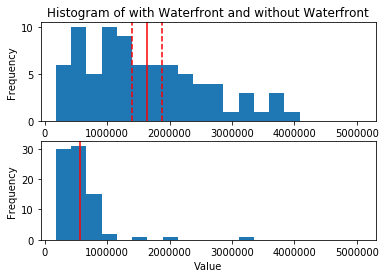

In [24]:
# Graphical Analysis for T- tests
%matplotlib inline
def hist_plot(vec, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
 # Function to plot confidence interval   
def hist_mean_ci(vec, t_test, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
# Plot for two column samples
def plot_t(a, b, t_test, cols=['a', 'b'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in np.arange(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histogram of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
    plt.show()

plot_t(withWaterfront, withoutWaterfront, test_waterfront, cols=['with Waterfront', 'without Waterfront']) 


##### Results of Graphical analysis - The mean of house price with waterfront view and without waterfront view are not within the confidence interval. This confirms that we select the alternate hypothesis that there is significant difference in these means and we reject the null hypothesis.

### Bootstrap Method

In [25]:
# Calculate price mean difference bewtween Houses Price with waterfront and House price without waterfront
withWaterfront_mean = HousePrice[HousePrice['waterfront'] == 1].price.mean()
withoutWaterfront_mean = HousePrice[HousePrice['waterfront'] == 0].price.mean()
originalMean = withWaterfront_mean - withoutWaterfront_mean

# Calculate price std difference between Houses Price with waterfront and House price without waterfront
withWaterfront_std = HousePrice[HousePrice['waterfront'] == 1].price.std()
withoutWaterfront_std = HousePrice[HousePrice['waterfront'] == 0].price.std()
originalStd = withWaterfront_std- withoutWaterfront_std

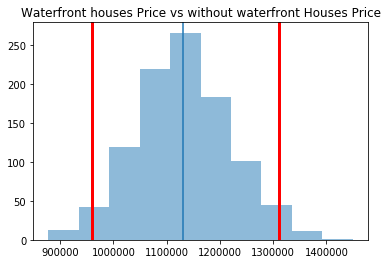

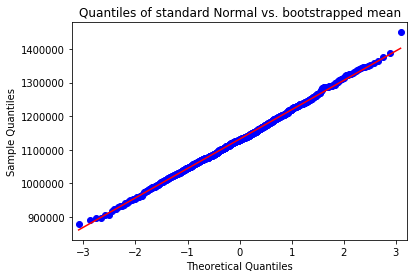

Estimated mean (1131423.859) vs actual mean (1130312.425)
Estimated s.d. (87544.641) vs actual s.d./sqrt(size) (5297.279)


In [26]:
# Summary statistics for Bootstrap- Houses Price with waterfront and House price without waterfront
def plot_hist(x, p=5, bins=10):
    # Plot the distribution and mark the mean
    plt.hist(x, alpha=.5, bins=bins)
    plt.axvline(x.mean())
    # 95% confidence interval    
    plt.axvline(np.percentile(x, p/2.), color='red', linewidth=3)
    plt.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)

# Calculate sample mean difference between Houses Price with waterfront and House price without waterfront
n_replicas = 1000
diffs = []
for i in range(n_replicas):
    sample = HousePrice.sample(frac=1.0, replace=True) # sample
    withWaterfront_sample_mean = sample[sample['waterfront'] == 1].price.mean() # Get waterfront view house price mean
    withoutWaterfront_sample_mean = sample[sample['waterfront'] == 0].price.mean()# Get without waterfront view house price mean
    diffs.append(withWaterfront_sample_mean - withoutWaterfront_sample_mean)# Get difference of means
diffs = pd.Series(diffs)
# Plot histogram
plt.title('Waterfront houses Price vs without waterfront Houses Price')
plot_hist(diffs)
# Q-Q Plot
fig = sm.qqplot(diffs, line='s')
plt.title('Quantiles of standard Normal vs. bootstrapped mean')
plt.show()

# Summary statistics
size = 300
pop_mean = diffs.mean()
pop_std = diffs.std()
print('Estimated mean (%.3f) vs actual mean (%.3f)' % (pop_mean, originalMean))
print('Estimated s.d. (%.3f) vs actual s.d./sqrt(size) (%.3f)' % (pop_std, originalStd/np.sqrt(HousePrice.shape[0])))

##### The distribution of the difference in means is far from zero. As a result , we can infer that the means of the two populations are significantly different. 
##### The points on the Q-Q Normal plot are nearly on a straight line. The distribution of the difference in means are normal, as implied by the CLT. Thus, the bootstrap distribution of the difference in means does conform to the CLT.

In [27]:
# confidence interval for classical Bootstrap
alpha = 0.95
half_width = scipy.stats.norm.ppf((1 + alpha)/2, loc=pop_mean, scale=pop_std) - pop_mean
print('The half width is %.2f' % half_width)

ci_low = pop_mean - half_width
ci_high = pop_mean + half_width

print('The actual mean is %.2f' % originalMean)
print('The %.2f level CI is (%.2f , %.2f)' % (alpha, ci_low, ci_high))

The half width is 171584.34
The actual mean is 1130312.42
The 0.95 level CI is (959839.52 , 1303008.20)


### Bayesian Method

Mean = 14.103, Standard deviation = 0.685


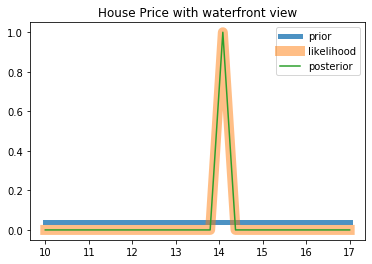

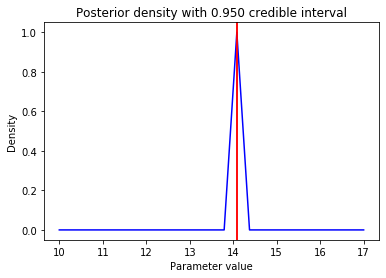

The 0.950 credible interval is 0.025 to 0.975
Mean = 13.040, Standard deviation = 0.517


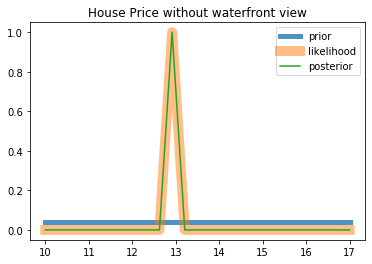

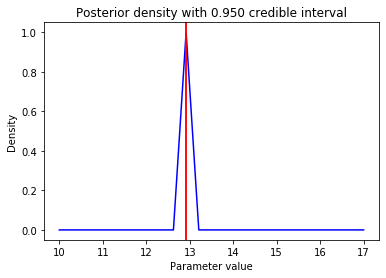

The 0.950 credible interval is 0.025 to 0.975


In [28]:
# Bayesian Method for House Price with waterfront view & House Price without waterfront view
N = 25
p = np.linspace(10, 17, num=N)# linspace to spread the values for x axis    

def posterior(prior, like):
    post = prior * like # compute the product of the probabilities
    return post / sum(post) # normalize the distribution to sum to unity

# Function to compute likelihood
def comp_like(p, x): 
    variance = np.std(x)**2 # sigmasqr
    x_mean = np.asarray(x).mean()  # xbar
    print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, np.std(x)))
    n = len(x)
    l = np.exp(-n * np.square(x_mean - p) / (2 * variance))
    return l / l.sum()

 # Function to compute prior, likelihood and posterior and calculate confidence interval 
def bayesianPlotCi(col, columnValue,Title, lower_q, upper_q):
    filteredrows = HousePrice[HousePrice[col] == columnValue]# group by 'waterfront' type   
    pp = scipy.stats.norm.pdf(p, loc=filteredrows.log_price.mean(), scale=2000)# Calculate prior probability
    pp = pp / pp.sum() # normalize
    like_Price = comp_like(p, filteredrows.log_price)
    post_Price = posterior(pp, like_Price)# Function call to calculate posterior house price    
    #Plot the graph for prior, likelihood & posterior
    plt.plot(p, pp, label='prior', alpha = .8, linewidth=5)
    plt.plot(p, like_Price, label='likelihood', alpha=.5, linewidth=10)
    plt.plot(p, post_Price, label='posterior')
    plt.title(Title)
    plt.legend()
    plt.show()
    
    ## This function computes a credible interval using an assumption of symetry in the bulk of the distribution to keep the calculation simple. 
    ## Compute a large sample by resampling with replacement
    #print(p)
    samples = np.random.choice(p, size=N, replace=True, p=post_Price)
    ci = scipy.percentile(samples, [lower_q*100, upper_q*100]) # compute the quantiles    
    interval = upper_q - lower_q
    plt.title('Posterior density with %.3f credible interval' % interval)
    plt.plot(p, post_Price, color='blue')
    plt.xlabel('Parameter value')
    plt.ylabel('Density')
    plt.axvline(x=ci[0], color='red')
    plt.axvline(x=ci[1], color='red')
    plt.show()
    print('The %.3f credible interval is %.3f to %.3f' 
          % (interval, lower_q, upper_q))

bayesianPlotCi('waterfront',1,'House Price with waterfront view', lower_q=.025, upper_q=.975)
bayesianPlotCi('waterfront',0,'House Price without waterfront view', lower_q=.025, upper_q=.975)

##### By comparing the posterior distributions of the mean house Prices with waterfront view to the distribution of the mean House Prices without waterfront view and computing and plotting the confidence intervalfor the two means we see that there is significant price difference between them.

## Leverage confidence intervals in performing hypothesis tests (either classical or bootstrap) to determine if the differences in pairs and multiple populations are significant

#### ANNOVA and Tukey's HSD Test to House Price vs 'Waterfront','Condition', 'Grade', 'Bedrooms','Renovated' features

In [29]:
# 3. Apply ANOVA and Tukey's HSD test to the House price data to compare the price 
# of different house condition, different house grades and houses with renovation and with out renovation

# select the rows that have a house condition of poor, pristine and good
groups = HousePrice.loc[HousePrice.loc[:, 'condition'].isin(['good','pristine','poor']), :] 
stratified_condition = stratify(groups,'condition',0.05)#Stratify groups for house condition
poor_condition = stratified_condition.loc['poor','price'] # Get rows only for condition 5
good_condition = stratified_condition.loc['good','price'] # Get rows only for condition 5
pristine_condition = stratified_condition.loc['pristine','price']# Get rows only for condition 4


# # select the rows that have a grade of 7, 8 & 9
grade_groups = HousePrice.loc[HousePrice.loc[:, 'grade'].isin([7,8,9]), :] 
stratified_grade = stratify(grade_groups,'grade',0.05)# Stratify grade groups
grade_7 = stratified_grade.loc[7,'price']# Get rows only for grade 7
grade_8 = stratified_grade.loc[8,'price']# Get rows only for grade 8
grade_9 = stratified_grade.loc[9,'price']# Get rows only for grade 9

stratified_renovation = stratify(HousePrice,'renovated',0.05) # Stratify by renovation
renovation = stratified_renovation.loc[1,'price']# Get rows only renovated houses
no_renovation = stratified_renovation.loc[0,'price']# Get rows for not renovated houses 

bedrooms_groups = HousePrice.loc[HousePrice.loc[:, 'bedrooms'].isin([3,4]), :] 
stratified_bedrooms = stratify(bedrooms_groups,'bedrooms',0.05) # Stratify bedroom groups
bedrooms_3 = stratified_bedrooms.loc[3,'price']# Get rows only 3 bedroom houses
bedrooms_4 = stratified_bedrooms.loc[4,'price']# Get rows only 4 bedroom houses 

stratified_waterfront = stratify(HousePrice,'waterfront',0.05) # Stratify waterfront groups
withWaterfront = stratified_waterfront.loc[1,'price']# Get rows only waterfront houses
withoutWaterfront = stratified_waterfront.loc[0,'price']# Get rows for no waterfront houses 

f_statistic, p_value = ss.f_oneway(poor_condition,good_condition, pristine_condition,grade_7,grade_8,grade_9,renovation,no_renovation,bedrooms_3,bedrooms_4,withWaterfront,withoutWaterfront)#Fstats for 10 groups
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))
print(" ")


F statistic = 20.072161853002846
P-value = 1.431983514671591e-37
 


        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
group1 group2    meandiff   p-adj      lower        upper     reject
--------------------------------------------------------------------
     1     10    -3785.0262    0.9  -440473.8372  432903.7849  False
     1     11    1141218.75  0.001   495503.6927 1786933.8073   True
     1     12      -16775.0    0.9  -662490.0573  628940.0573  False
     1      2      -80102.0    0.9  -688887.9943  528683.9943  False
     1      3     -472850.0 0.3142 -1081635.9943  135935.9943  False
     1      4  -258152.7462 0.7356  -704879.5348  188574.0425  False
     1      5  -142207.5077    0.9  -588934.2964   304519.281  False
     1      6   139436.6385    0.9  -307290.1502  586163.4271  False
     1      7   287652.2889 0.6811  -188257.6148  763562.1926  False
     1      8  -193684.6444    0.9  -669594.5481  282225.2593  False
     1      9  -200987.8023    0.9  -637676.6134  235701.0087  False
    10     11  1145003.7762  0.001

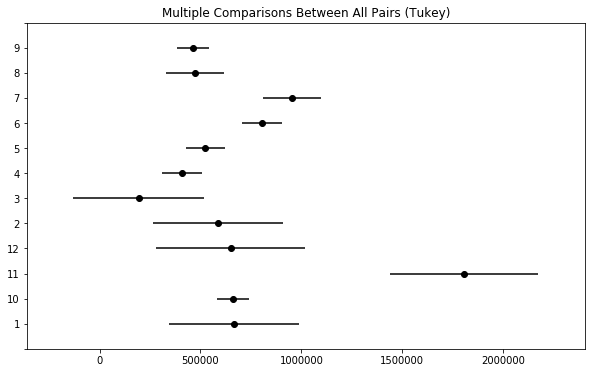

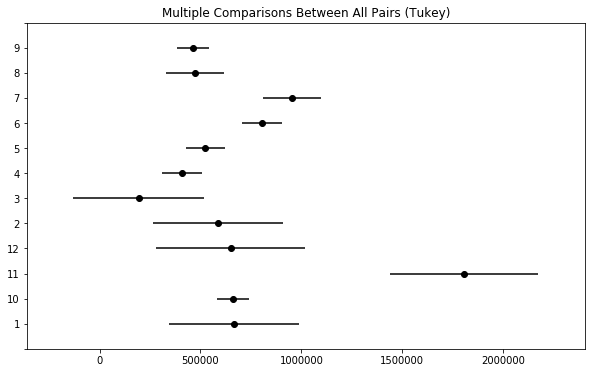

In [30]:
# Tukey HSD for 10 diffrent groups vs price
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df_HousePrice_condition = pd.DataFrame({'vals': 
                              pristine_condition                               
                               .append(good_condition)
                               .append(poor_condition)
                               .append(grade_7)
                               .append(grade_8)
                               .append(grade_9)
                               .append(renovation)
                               .append(no_renovation)
                               .append(bedrooms_3)
                               .append(bedrooms_4)
                               .append(withWaterfront)
                               .append(withoutWaterfront),                               
                   'group_num': ['1'] * pristine_condition.shape[0] 
                               + ['2'] * good_condition.shape[0] 
                               + ['3'] * poor_condition.shape[0]
                               + ['4'] * grade_7.shape[0]
                               + ['5'] * grade_8.shape[0]
                               + ['6'] * grade_9.shape[0]
                               + ['7'] * renovation.shape[0]
                               + ['8'] * no_renovation.shape[0]
                               + ['9'] * bedrooms_3.shape[0]
                               + ['10'] * bedrooms_4.shape[0]
                               + ['11'] * withWaterfront.shape[0]
                               + ['12'] * withoutWaterfront.shape[0]})                    


Tukey_HSD_HousePrice = pairwise_tukeyhsd(df_HousePrice_condition.vals, df_HousePrice_condition.group_num)#Calculate Tukey scores
print(Tukey_HSD_HousePrice)

Tukey_HSD_HousePrice.plot_simultaneous()# Plot Tukey graph

##### The means for Price of Grade- 7 houses with pristine condition- and renovated have a significant price difference as their confidence intervals dont overlap shown from the above graph.
##### The means for Price of Grade- 9 houses with good condition and  not renovated have a significant price difference as their confidence intervals dont overlap shown from the above graph.
#####  Since p values for (three bedroom houses and good condition  houses),(four bedroom houses and grade-7 houses) are less than alpha. There is significant difference in price.We select the alertnate hypothesis.
##### p value for four bedroom houses without any renovation are more than alpha value. So there is no significant difference in price for these categories. We select the null hypothesis and reject the alternate hypothesis.

### Boostrap for  Pairs & Multiple population

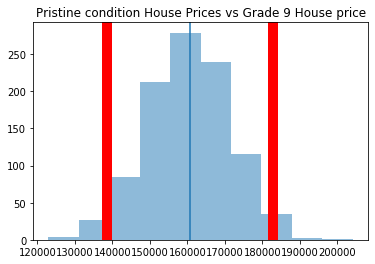

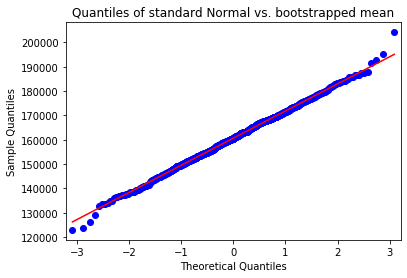

Estimated mean (160651.982) vs actual mean (-161095.096)
Estimated s.d. (11149.038) vs actual s.d./sqrt(size) (645.191)


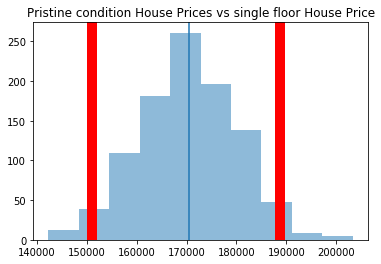

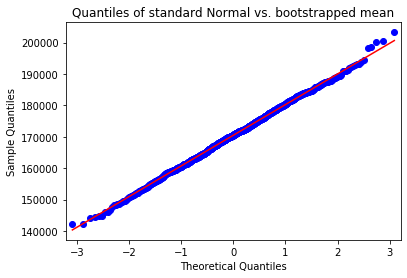

Estimated mean (170492.549) vs actual mean (-170237.457)
Estimated s.d. (9765.514) vs actual s.d./sqrt(size) (-999.694)


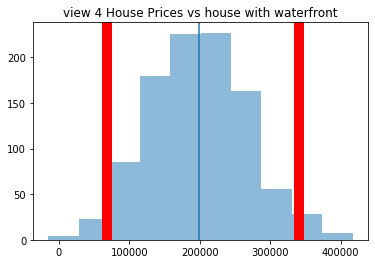

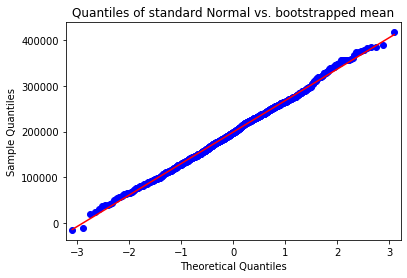

Estimated mean (199006.973) vs actual mean (-198164.786)
Estimated s.d. (68919.977) vs actual s.d./sqrt(size) (-1143.855)


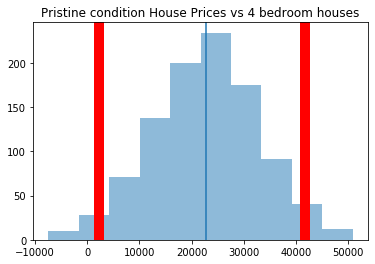

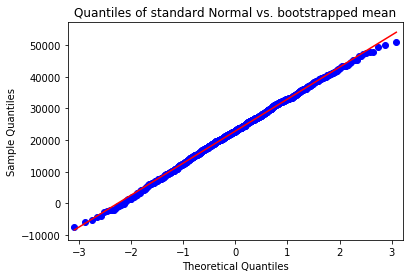

Estimated mean (22843.869) vs actual mean (-23001.415)
Estimated s.d. (10098.384) vs actual s.d./sqrt(size) (152.214)


In [31]:
# Summary statistics for Bootstrap- 
def plot_hist(x, p=5, bins=10):
    # Plot the distribution and mark the mean
    plt.hist(x, alpha=.5, bins=bins)
    plt.axvline(x.mean())
    # 95% confidence interval    
    plt.axvline(np.percentile(x, p/2.), color='red', linewidth=10)
    plt.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=10)
# Bootstrap for different column combinations
def bootstrap(col1, col1value, col2, col2value, Title, origMean, origStd):
    n_replicas = 1000
    diffs = []
    for i in range(n_replicas):
        sample = HousePrice.sample(frac=1.0, replace=True)# Sample
        mean1 = sample[sample[col1] == col1value].price.mean()# Price mean sample1
        mean2 = sample[sample[col2] == col2value].price.mean()# Price mean for sample2
        diffs.append(mean2 - mean1) # Mean difference
    diffs = pd.Series(diffs)

    plot_hist(diffs)  # Plot histogram  
    plt.title(Title)# Title
    plt.show()
    # Q-Q Plot
    fig = sm.qqplot(diffs, line='s')
    plt.title('Quantiles of standard Normal vs. bootstrapped mean')
    plt.show()
    
    # Summary statistics
    size = 300
    pop_mean = diffs.mean()
    pop_std = diffs.std()
    print('Estimated mean (%.3f) vs actual mean (%.3f)' % (pop_mean, origMean))
    print('Estimated s.d. (%.3f) vs actual s.d./sqrt(size) (%.3f)' % (pop_std, origStd/np.sqrt(HousePrice.shape[0])))

bootstrap('condition', 'pristine', 'grade', 9, 'Pristine condition House Prices vs Grade 9 House price', 
          HousePrice[HousePrice['condition'] == 'pristine'].price.mean() - HousePrice[HousePrice['grade'] == 9].price.mean(),
          HousePrice[HousePrice['condition'] == 'pristine'].price.std() - HousePrice[HousePrice['grade'] == 9].price.std())
bootstrap('floors', 1.0, 'condition', 'pristine', 'Pristine condition House Prices vs single floor House Price',
          HousePrice[HousePrice['floors'] == 1.0].price.mean() - HousePrice[HousePrice['condition'] == 'pristine'].price.mean(),
          HousePrice[HousePrice['floors'] == 1.0].price.std() - HousePrice[HousePrice['condition'] == 'pristine'].price.std())
bootstrap('view', 4, 'waterfront', 1, 'view 4 House Prices vs house with waterfront',
          HousePrice[HousePrice['view'] == 4].price.mean() - HousePrice[HousePrice['waterfront'] == 1].price.mean(),
          HousePrice[HousePrice['view'] == 4].price.std() - HousePrice[HousePrice['waterfront'] == 1].price.std())
bootstrap('condition', 'pristine', 'bedrooms', 4, 'Pristine condition House Prices vs 4 bedroom houses',
          HousePrice[HousePrice['condition'] == 'pristine'].price.mean() - HousePrice[HousePrice['bedrooms'] == 4].price.mean(),
          HousePrice[HousePrice['condition'] == 'pristine'].price.std() - HousePrice[HousePrice['bedrooms'] == 4].price.std())


##### The average Price of pristine condition  homes with grade 9 and average price of pristine condition  homes with one floor and avergae price of view 4 houses with a waterfront view have the distribution of the difference in means far from zero. As a result , we can infer that the means of the two populations compared in each of the above case are significantly different. 
##### The average price of houses with 4 bedrooms and pristine condition  have their difference in means very close to zero. As a result we infer that they do not have any significant price difference.

# Regression Models
### Linear Regression including all feature columns


In [32]:
# Select the target and feature varaibles for PCA.
target_label = 'price'
# feature_labels
feature_labels = [x for x in HousePrice.columns if x not in ['price','log_price','condition']]# Condition column was not dropped before because it was used in hypothesis testing.

In [33]:
#Assign x & y with feature and target.
x = HousePrice[feature_labels]
y = HousePrice[target_label]
#Scale the data
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
# Initialize the model
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x,y)
# Predict
y_predicted = regression_model.predict(x)

In [34]:
print('Intercept: ', regression_model.intercept_) # pull out intercept
print('Coefficients: ', regression_model.coef_) # pull out coeffeicients
print('Root mean squared error: ', mean_squared_error(y, y_predicted))# Mean squared error
print('R2 score: ',  r2_score(y, y_predicted))# R2 score

Intercept:  540088.1417665293
Coefficients:  [-36036.35602481  34262.17705991 145519.53473291   -212.56938473
  13259.63554456  50205.9305059   33284.36565924 140623.57071809
   3452.57535559   5107.09965557  17138.62471666 -14648.02891749
 106039.54316787   3384.19032134  -1950.24820264  -5804.66688305
   6805.34775517]
Root mean squared error:  46619722739.46616
R2 score:  0.6540951390236447


In [35]:
# Adding a constant
X = sm.add_constant(x)
# Model fit and summary
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2552.
Date:                Sat, 13 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:19:08   Log-Likelihood:            -2.9613e+05
No. Observations:               21613   AIC:                         5.923e+05
Df Residuals:                   21596   BIC:                         5.924e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.401e+05   1469.258    367.592      0.0

##### Though R squared value is 0.65 this model results in strong multicollinearity problem as the smallest eigenvalue is 3.48e-27.

### Feature Selection for Linear Regression
#### PCR & PCA

In [36]:
# One-hot encode inputs
HousePrice_expanded = pd.get_dummies(HousePrice, drop_first=True)
print('DataFrame one-hot-expanded HousePrice: {}'.format(HousePrice_expanded.shape))

# Get target and original x-matrix
y1 = HousePrice[target_label]
# X1 = HousePrice.as_matrix(columns=feature_labels)
X1 = HousePrice[feature_labels]

DataFrame one-hot-expanded HousePrice: (21613, 21)


In [37]:
HousePrice.columns
print(feature_labels)
# print(HousePrice_expanded)
print(X1.shape)


['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'house_age', 'renovated', 'poor_condition', 'good_Condition', 'pristine_condition']
(21613, 17)


In [38]:
# Scale function
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

In [39]:
# Scale all columns first
x_scaled = np.apply_along_axis(scale, 0, X1)

# Create a scaled y-target.
y_scaled = np.apply_along_axis(scale, axis=0, arr=y1)

In [40]:
# PCR!!
#Initialize PCA
pca = PCA()
pca_result = pca.fit_transform(x_scaled)
# Data projected into Principal components
column_names = ['pc' + str(ix+1) for ix in range(x_scaled.shape[1])]
pca_df = pd.DataFrame(data = pca_result, columns=column_names)
pca_df[target_label] = y_scaled

Text(0, 0.5, 'Explained Variance')

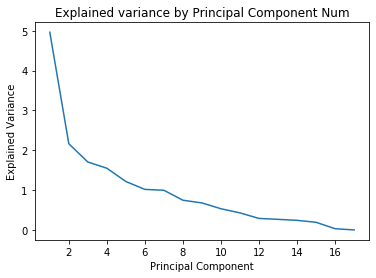

In [41]:
# Scree Plot for explained variance for all principal components.
plt.plot([i + 1 for i in range(17)], pca.explained_variance_)
plt.title('Explained variance by Principal Component Num')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

##### From Scree plot we select the number of components to be 5

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     5579.
Date:                Sat, 13 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:19:09   Log-Likelihood:                -21709.
No. Observations:               21613   AIC:                         4.343e+04
Df Residuals:                   21607   BIC:                         4.348e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.643e-17      0.004  -8.11e-15      1.0

Text(0.5, 1.0, 'Residual Histogram')

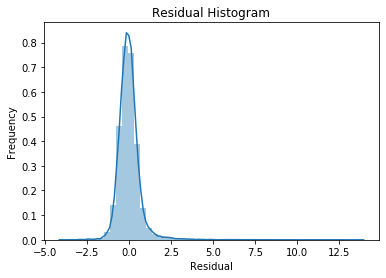

In [42]:
#linear regression with the first N columns.
n = 5
formula_start = target_label + ' ~ '
formula_terms = ['pc' + str(x+1) for x in range(n)]
formula_end = ' + '.join(formula_terms)
formula_final = formula_start + formula_end
# Get linear model using ordinary least squares
pcr_model = smf.ols(formula = formula_final, data=pca_df)
# Fit linear model
results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

##### Number of feature components is 17. After looking at the scree plot, number of principal components choosen was 6, because there is a cut off after first 6 dimensions and the biggest drop was found between the 5th and 7th dimension. 90% of the variance was found in the first six components.

##### Adjusted R squared value is 0.564. This means only 0.564 percetage of varaince of the underlying data was captured by our linear model.


### Lasso Regression

In [43]:
# Divide the data into training and test data
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [44]:
#Build a laso model
lasso_model = Lasso(alpha=5,normalize=True)
print(lasso_model.fit(x_train,y_train))
# Get scores for training data
lasso_model.score(x_train,y_train)

Lasso(alpha=5, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)


0.6479523064817324

In [45]:
# Get the coefficients of features
predictors = X1.columns
coef = pd.Series(lasso_model.coef_,predictors).sort_values()
print(coef)

bedrooms              -37982.159416
sqft_lot15            -13455.570554
good_Condition          -112.190204
poor_condition             0.000000
sqft_lot                   0.000000
sqft_above               799.591312
sqft_basement           3151.343012
renovated               4518.323473
pristine_condition     10876.553601
floors                 11586.383536
sqft_living15          15688.085290
view                   32212.583893
bathrooms              33222.079287
waterfront             48207.765337
house_age             104580.906190
grade                 138168.580215
sqft_living           152083.754627
dtype: float64


In [46]:
# Predict values using laso model
y_predict = lasso_model.predict(x_test)
# Print r squared value for test scores
print('Root mean squared error: ', mean_squared_error(y_test, y_predict))# Mean squared error
print('R2 score: ',  r2_score(y_test, y_predict))# R2 score

Root mean squared error:  45319511935.74458
R2 score:  0.6711734240611763


## Ridge Regression

In [47]:
#Build a Ridge regression model
ridge_model = Ridge(alpha=1,normalize=True)
print(ridge_model.fit(x_train,y_train))
# Print scores for training data
ridge_model.score(x_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)


0.5740266663976938

In [48]:
# Get prediction values for test data
y_predict = ridge_model.predict(x_test)
# Get R squared value for ridge regression
print('Root mean squared error: ', mean_squared_error(y_test, y_predict))# Mean squared error
print('R2 score: ',  r2_score(y_test, y_predict))# R2 score

Root mean squared error:  55712335727.56413
R2 score:  0.5957658012552443


In [49]:
# Get ridge coefficients for feature columns
predictors = X1.columns
coef = pd.Series(ridge_model.coef_,predictors).sort_values()
print(coef)

good_Condition        -7155.130586
sqft_lot15            -2847.648048
poor_condition        -2689.005817
sqft_lot               1455.479305
bedrooms               3121.635580
pristine_condition     8451.644348
floors                 9393.364908
renovated             13524.168687
sqft_basement         20456.862421
bathrooms             28550.611712
waterfront            29602.531775
house_age             31348.961138
view                  34866.040198
sqft_living15         38036.284044
sqft_above            42367.289229
sqft_living           55680.362241
grade                 60371.756865
dtype: float64


#### Results of three Regression models -
##### Building a linear model by selecting all the features from the data set to predict price value results in strong multicollinearity problem as the smallest eigenvalue is 3.48e-27.Though R squared value is 0.65.

##### In order to overcome the problem of multicollinearity, we do feature selection with Principle Component Analysis. PCR is used to calculate the principal components and then use these components for price predictions in linear regression model fit using the least squares method. From scree plot we select the number of principal componenet for analysis to be 5 and it performs a linear regression with first 65columns and finds the best fit with Rsquared value of 0.564.

##### Laso Regression - The R squared value is 0.653
##### Ridge Regression - The Rsquared value is 0.587

#### From the above results- laso regression performs well.

# Classification Model

In [50]:
# Get the median house Price 
median = np.median(HousePrice['price'])
# create an empty list - 'medianPrice'
medianPrice = []
for i in HousePrice.loc[:,'price'] :
    if i > median :        
        medianPrice.append('True')
    else:
         medianPrice.append('False')
#create a new column 'price_greaterThsn_median' and assign the values from medianPrice list
HousePrice['price_greaterThan_median'] = medianPrice

## Feature Selection for building a classification model

### Univaraite feature selection from f- test classification

In [51]:
HousePrice.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,sqft_living15,sqft_lot15,house_age,renovated,poor_condition,good_Condition,pristine_condition,log_price,price_greaterThan_median
0,221900.0,3,1.00,1180,5650,1.0,0,0,good,7,...,0,1340,5650,59,0,0,1,0,12.309982,False
1,538000.0,3,2.25,2570,7242,2.0,0,0,good,7,...,1,1690,7639,63,1,0,1,0,13.195614,True
2,180000.0,2,1.00,770,10000,1.0,0,0,good,6,...,0,2720,8062,82,0,0,1,0,12.100712,False
3,604000.0,4,3.00,1960,5000,1.0,0,0,pristine,7,...,1,1360,5000,49,0,0,0,1,13.311329,True
4,510000.0,3,2.00,1680,8080,1.0,0,0,good,8,...,0,1800,7503,28,0,0,1,0,13.142166,True


In [52]:
# Target - classification label column
target = HousePrice['price_greaterThan_median']
# Select all the columns except for price and price greater than median
feature = HousePrice.drop(['price_greaterThan_median','price','condition'],axis = 1)

In [53]:
# Use select K Best method to select the features needed for classification
get_univariate = SelectKBest(f_classif,k=6).fit(feature,target)
# Shows the features selected
feature_mask = get_univariate.get_support()
get_columns = feature.columns[feature_mask]

# select the feature columns
selected_features = feature[get_columns]
print(selected_features.head())
selected_features.describe()

   bathrooms  sqft_living  grade  sqft_above  sqft_living15  log_price
0       1.00         1180      7        1180           1340  12.309982
1       2.25         2570      7        2170           1690  13.195614
2       1.00          770      6         770           2720  12.100712
3       3.00         1960      7        1050           1360  13.311329
4       2.00         1680      8        1680           1800  13.142166


,bathrooms,sqft_living,grade,sqft_above,sqft_living15,log_price
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2.114757,2079.899736,7.656873,1788.390691,1986.552492,13.047817
std,0.770163,918.440897,1.175459,828.090978,685.391304,0.526685
min,0.000000,290.000000,1.000000,290.000000,399.000000,11.225243
25%,1.750000,1427.000000,7.000000,1190.000000,1490.000000,12.682152
50%,2.250000,1910.000000,7.000000,1560.000000,1840.000000,13.017003
75%,2.500000,2550.000000,8.000000,2210.000000,2360.000000,13.377006
max,8.000000,13540.000000,13.000000,9410.000000,6210.000000,15.856731


In [54]:
# Convert 'price_greaterThan_median' column data type from object to category
HousePrice['price_greaterThan_median'] = HousePrice['price_greaterThan_median'].astype('object').astype(
    'category', category=['True', 'False'])

print(HousePrice.dtypes)

price                        float64
bedrooms                       int64
bathrooms                    float64
sqft_living                    int64
sqft_lot                       int64
floors                       float64
waterfront                     int64
view                           int64
condition                     object
grade                          int64
sqft_above                     int64
sqft_basement                  int64
sqft_living15                  int64
sqft_lot15                     int64
house_age                      int64
renovated                      int64
poor_condition                 int32
good_Condition                 int32
pristine_condition             int32
log_price                    float64
price_greaterThan_median    category
dtype: object


### Build a classification model

In [55]:
# Select the feature columns and target columns
x = HousePrice[['bedrooms','bathrooms','sqft_living','grade','sqft_above','sqft_living15']]
y = HousePrice['price_greaterThan_median']

### Multinomial Naive Bayes Model

In [56]:
# Divide the data into training and test data
x_train,x_test,y_train,y_test = train_test_split(x,y)

# Create the Multinomial Model using training data
MultiNB = MultinomialNB(alpha = 1)
MultiNB.fit(x_train,y_train)
print(MultiNB)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)


### Gaussian Naive Bayes Model

In [57]:
# Create the Gausian Model using training data
GausNB = GaussianNB()
GausNB.fit(x_train,y_train)
print(GausNB)

GaussianNB(priors=None, var_smoothing=1e-09)


## Model Evaluation
### Scores: Accuracy, Precision, Recall, F1 Score & Confusion Matrix

In [58]:
# Confusion matrix for true(actual) vs predicted results
def confusion_matrix(labels, predicted_labels, label_classes):
    return pd.DataFrame(
        sklearn.metrics.confusion_matrix(labels, predicted_labels),
        index=[label_classes], 
        columns=label_classes)    

#Test Model using standard accuracy measures
def performance(results,modelName):
    accuracy = metrics.accuracy_score(results['priceGreaterThanMedian'], results['predicted'])# calculate Accuracy measures
    precision = metrics.precision_score(results['priceGreaterThanMedian'], results['predicted'],pos_label='True')# calculate precision measure
    recall = metrics.recall_score(results['priceGreaterThanMedian'], results['predicted'],pos_label='True')# calculate recall measure
    f1Score = metrics.f1_score(results['priceGreaterThanMedian'], results['predicted'],pos_label='True')# calculate f1_score measure
    
    print(modelName)
    print('Accuracy = %.3f, Precision = %.3f, Recall = %.3f, F1 Score = %3f' % (accuracy, precision, recall,f1Score))    
    print (confusion_matrix(results['priceGreaterThanMedian'], results['predicted'], results.priceGreaterThanMedian.cat.categories))

Gaussian Naive Bayes
Accuracy = 0.724, Precision = 0.794, Recall = 0.599, F1 Score = 0.682709
       False  True
False   2311   417
True    1073  1603
 
ROC curve for Gaussian Naive Bayes

TP rates: [0.   0.05 0.05 ... 1.   1.   1.  ]

FP rates: [0.   0.   0.   ... 0.99 0.99 1.  ]

Probability thresholds: [2. 1. 1. ... 0. 0. 0.]


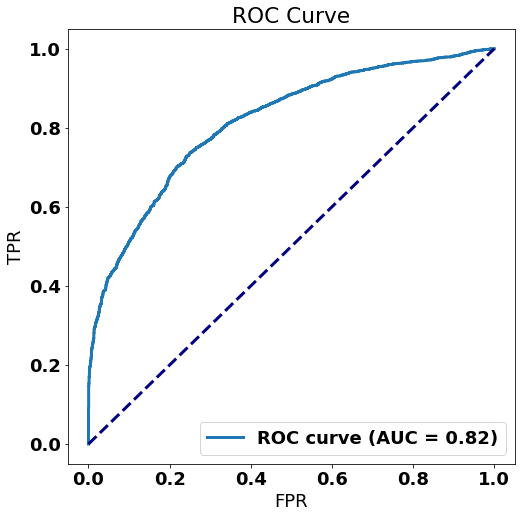

 
Multinomial Naive Bayes
Accuracy = 0.595, Precision = 0.612, Recall = 0.499, F1 Score = 0.550021
       False  True
False   1882   846
True    1340  1336
 
ROC curve for Multinomial Naive Bayes

TP rates: [0.   0.23 0.24 ... 1.   1.   1.  ]

FP rates: [0.   0.08 0.08 ... 1.   1.   1.  ]

Probability thresholds: [2. 1. 1. ... 0. 0. 0.]


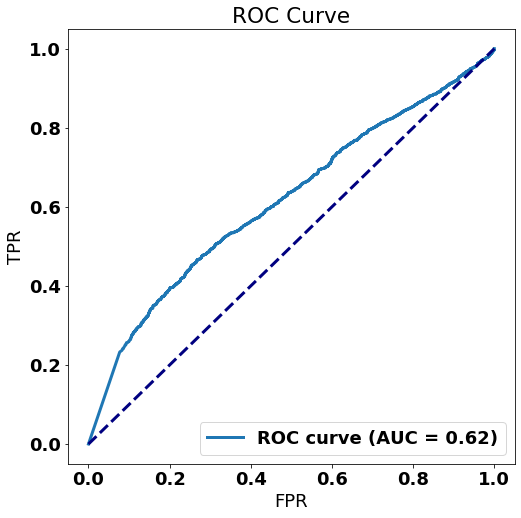

In [59]:
# Get predicted results for Naive Bayes models for Test data
def getPredictedValues(modelName,Title) :
    predicted_price_test = modelName.predict(x_test)# Predicted 'price_Greaterthan_median' values 
    price_probabilities_test = modelName.predict_proba(x_test)#  Probabilty scores for predicted values
    
    # create a datatframe 'results'
    results = pd.DataFrame({
        'priceGreaterThanMedian': y_test,
        'predicted': predicted_price_test,
        'proba(True)': price_probabilities_test[:, 0],
        'proba(False)': price_probabilities_test[:, 1],
    })
    
    performance(results,Title) # Get preformance scores
    print(" ")
    print('ROC curve for ' +  Title)
    fpr, tpr, th = roc_curve(y_test, price_probabilities_test[:, 1],pos_label='True') # ROC curve with AUC value
    AUC = auc(fpr, tpr) # calculate Area Under Curve value
    print ("\nTP rates:", np.round(tpr, 2))# Print true positive rate
    print ("\nFP rates:", np.round(fpr, 2))# Print false positive rate
    print ("\nProbability thresholds:", np.round(th, 2))# Print threshold values
    #Plot ROC curve with AUC value
    plt.rcParams["figure.figsize"] = [8, 8] # Square
    font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size' : 18}
    plt.rc('font', **font)
    plt.figure()
    plt.title('ROC Curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.plot(fpr, tpr, LW=3, label='ROC curve (AUC = %0.2f)' % AUC)
    plt.plot([0, 1], [0, 1], color='navy', LW=3, linestyle='--') # reference line for random classifier
    plt.legend(loc="lower right")
    plt.show()

getPredictedValues(GausNB,'Gaussian Naive Bayes')
print(" ")
getPredictedValues(MultiNB,'Multinomial Naive Bayes')

##### Accuracy for Gausian Naive Bayes is higher when compared to multinomial Naive Bayes. AUC value is also higher for Gausian NB.

##### Results of classification model
1. Selected 5 best features for building a classification model by using univaraite feature selection for classification.(Bedrooms,Bathrooms, sqft_living,grade,sqft_above & sqft_living15) are the features with top scores.
2. House Price predictiction dataset consists of all numerical values.
3. Here in this assignment I am building both Gausian and Multinomial Naive Bayes to compare their results.
4. Accuracy for Gaussian Naive Bayes is 0.714 and accuracy for multinomial is 0.587
5. Comparing the results,Gausian Naive Bayes model gives higher accuracy since the dataset consists of all numerical values.
6. ROC curve and AUC values also shows the same.